In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import pylab as plb
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
import plotfuncs as plf
plb.rcParams['pdf.fonttype'] = 42
plb.rcParams['image.interpolation'] = 'nearest'
plb.rcParams['image.aspect'] = 'auto'
plb.rcParams['image.cmap'] = 'BrBG'
import h5py
demo_mode = False

In [2]:
import h5py
trial_db = h5py.File('../02_imaging_post_processing/trial_db.hdf5','a')

In [4]:
trial_types = set(trial_db['trial_names'])
test_set = list(['stripe_fix'])
fly_set_22H05 = set(gd.GMR22H05_list)
fly_set_39E01 = set(gd.GMR39E01_list)

In [17]:
#mask out the data so only the trial types in test_set will be included we dont want to look
#at stripe fixation, or flight initataion or termination events
trial_mask = np.zeros(np.shape(trial_db['trial_names'])[0]).astype(bool)
for trial_name in test_set:
    trial_mask |=  (np.array(trial_db['trial_names']) == trial_name)

#now mask out the data to only include the flys in gd.GRM22H05_list
fly_mask_22H05 = np.zeros_like(trial_mask,dtype = bool)
for fly in fly_set_22H05:
    fly_mask_22H05 |= (np.array(trial_db['fly_numbers']) == fly)

#now mask out the data to only include the flys in gd.GRM22H05_list
fly_mask_39E01 = np.zeros_like(trial_mask,dtype = bool)
for fly in fly_set_39E01:
    fly_mask_39E01 |= (np.array(trial_db['fly_numbers']) == fly)
nsamps = np.shape(np.array(trial_db['wb_frequency'])[mask_22H05])[0]
#update the mask    
mask_22H05 = trial_mask & fly_mask_22H05
mask_39E01 = trial_mask & fly_mask_39E01

#Create a selection array to include only epochs with flight for for the entire trial - i.e. the number of samples
#with a wing-beat frequency > 100  was equal to the number of samples in the trial
flt_selection = np.nansum(np.array(trial_db['wb_frequency']) > 100,axis = 1)>=nsamps
mask_22H05 &= flt_selection
mask_39E01 &= flt_selection

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater


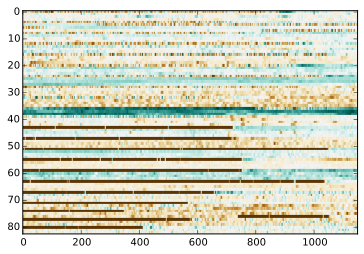

In [19]:
plb.imshow(np.array(trial_db['Ph0'])[mask_22H05])

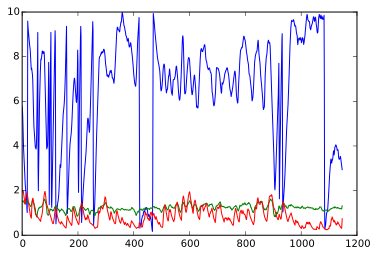

In [48]:
plb.plot(np.array(trial_db['Xpos'])[mask_22H05][18])
plb.plot(np.array(trial_db['b3'])[mask_22H05][18])
plb.plot(np.array(trial_db['i1'])[mask_22H05][18])

In [28]:
trial_db.keys()

[u'Ph0',
 u'Ph1',
 u'Ph2',
 u'StimCond',
 u'Xpos',
 u'Ypos',
 u'b1',
 u'b2',
 u'b3',
 u'exp_names',
 u'fly_numbers',
 u'genotypes',
 u'hg1',
 u'hg2',
 u'hg3',
 u'hg4',
 u'i1',
 u'i2',
 u'iii1',
 u'iii24',
 u'iii3',
 u'pr',
 u'signal_units',
 u'swarm_names',
 u'tpd',
 u'tpv',
 u'trial_names',
 u'trial_numbers',
 u'trial_times',
 u'ttm',
 u'wb_frequency']